In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
millionnaire = pd.DataFrame({"winnings": [0, 10, 20, 50, 100, 150, 1000, 10_000, 100_000, 1_000_000],
                      "tickets":[np.nan, 760_000, 840_000, 108_800, 60_000, 24_000, 200, 6, 4, 4]})
millionnaire

,winnings,tickets
0,0,NaN
1,10,760000.0
2,20,840000.0
3,50,108800.0
4,100,60000.0
5,150,24000.0
6,1000,200.0
7,10000,6.0
8,100000,4.0
9,1000000,4.0


In [50]:
ticket_price = 10
millionnaire.insert(1, "net_winnings", millionnaire.winnings - ticket_price)
millionnaire


,winnings,net_winnings,tickets
0,0,-10,NaN
1,10,0,760000.0
2,20,10,840000.0
3,50,40,108800.0
4,100,90,60000.0
5,150,140,24000.0
6,1000,990,200.0
7,10000,9990,6.0
8,100000,99990,4.0
9,1000000,999990,4.0


In [51]:
total_tickets = 6_000_000
winning_tickets = int(millionnaire.tickets.sum())
winning_tickets

millionnaire.loc[0, "tickets"] = total_tickets - winning_tickets
millionnaire.tickets = millionnaire['tickets'].astype('int')

millionnaire["ticket_percentage"] = millionnaire.tickets / total_tickets * 100
millionnaire

,winnings,net_winnings,tickets,ticket_percentage
0,0,-10,4206986,70.116433
1,10,0,760000,12.666667
2,20,10,840000,14.000000
3,50,40,108800,1.813333
4,100,90,60000,1.000000
5,150,140,24000,0.400000
6,1000,990,200,0.003333
7,10000,9990,6,0.000100
8,100000,99990,4,0.000067
9,1000000,999990,4,0.000067


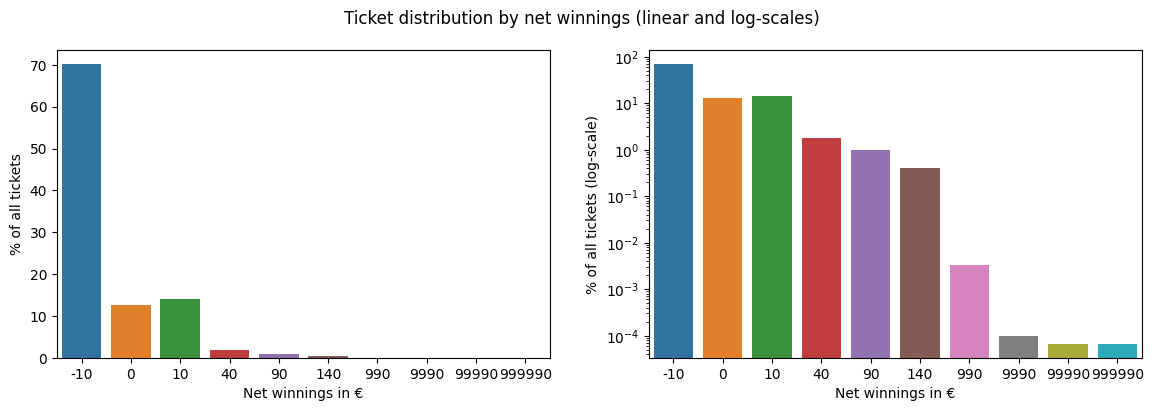

In [52]:
plt.figure(figsize=(14, 4))

ax1 = plt.subplot(1, 2, 1)
sns.barplot(data=millionnaire, x="net_winnings", y="ticket_percentage")
ax1.set_xlabel("Net winnings in €")
ax1.set_ylabel("% of all tickets")

ax2 = plt.subplot(1, 2, 2)
sns.barplot(data=millionnaire, x="net_winnings", y="ticket_percentage")
ax2.set_xlabel("Net winnings in €")
ax2.set_ylabel("% of all tickets (log-scale)")
ax2.set_yscale("log")

plt.suptitle("Ticket distribution by net winnings (linear and log-scales)")
plt.show()

In [53]:
millionnaire["total_net_winnings"] = millionnaire.net_winnings * millionnaire.tickets
millionnaire

,winnings,net_winnings,tickets,ticket_percentage,total_net_winnings
0,0,-10,4206986,70.116433,-42069860
1,10,0,760000,12.666667,0
2,20,10,840000,14.000000,8400000
3,50,40,108800,1.813333,4352000
4,100,90,60000,1.000000,5400000
5,150,140,24000,0.400000,3360000
6,1000,990,200,0.003333,198000
7,10000,9990,6,0.000100,59940
8,100000,99990,4,0.000067,399960
9,1000000,999990,4,0.000067,3999960


In [54]:
millionnaire[["tickets", "ticket_percentage", "total_net_winnings"]].sum().astype('int')

tickets                6000000
ticket_percentage          100
total_net_winnings   -15900000
dtype: int64

In [55]:
average_ticket_net_winnings = millionnaire["total_net_winnings"].sum() / total_tickets
percentage = -average_ticket_net_winnings / ticket_price
print(average_ticket_net_winnings, f"€, soit {percentage:.2%} du prix du ticket est perdu en moyenne")

-2.65 soit 26.50% du prix du ticket part à la FDJ


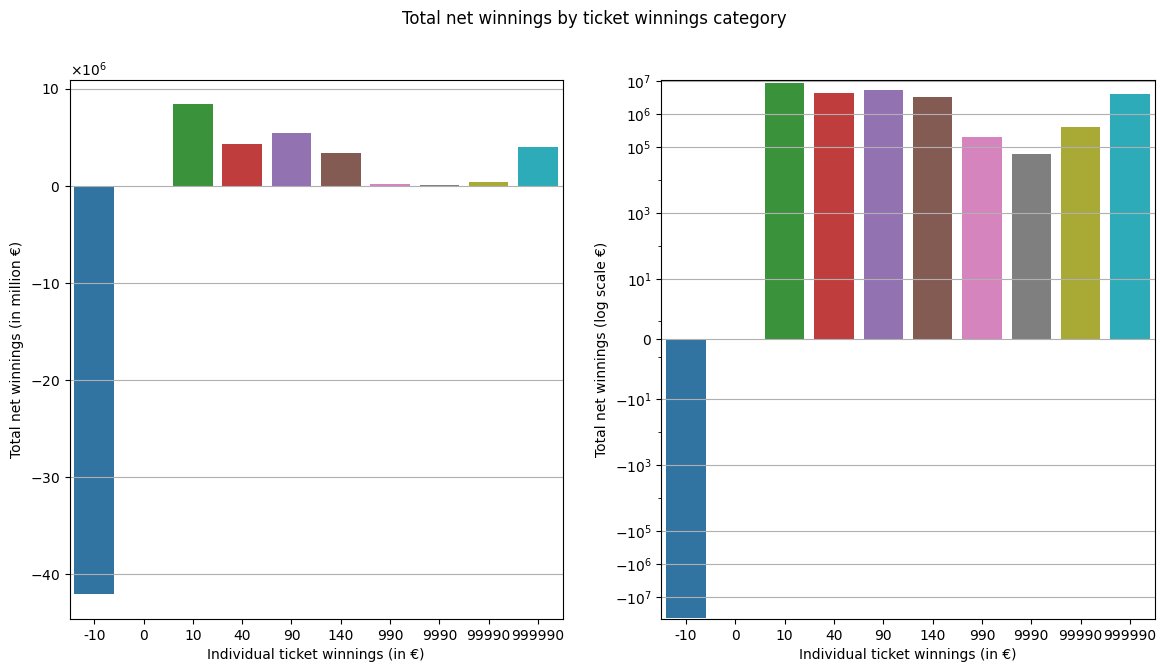

In [56]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(14, 7))
plt.suptitle("Total net winnings by ticket winnings category")

ax1 = plt.subplot(1, 2, 1)
sns.barplot(data=millionnaire, x="net_winnings", y="total_net_winnings")
plt.xlabel("Individual ticket winnings (in €)")
plt.ylabel("Total net winnings (in million €)")

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((6, 6))
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, axis="y")

ax2 = plt.subplot(1, 2, 2)
sns.barplot(data=millionnaire, x="net_winnings", y="total_net_winnings")
plt.xlabel("Individual ticket winnings (in €)")
plt.ylabel("Total net winnings (log scale €)")
plt.yscale("symlog")
plt.yticks([-10000000, -1000000, -100000, -1000, -10, 0, 10, 1000, 100000, 1000000, 10000000])
plt.grid(True, axis="y")

plt.show()
